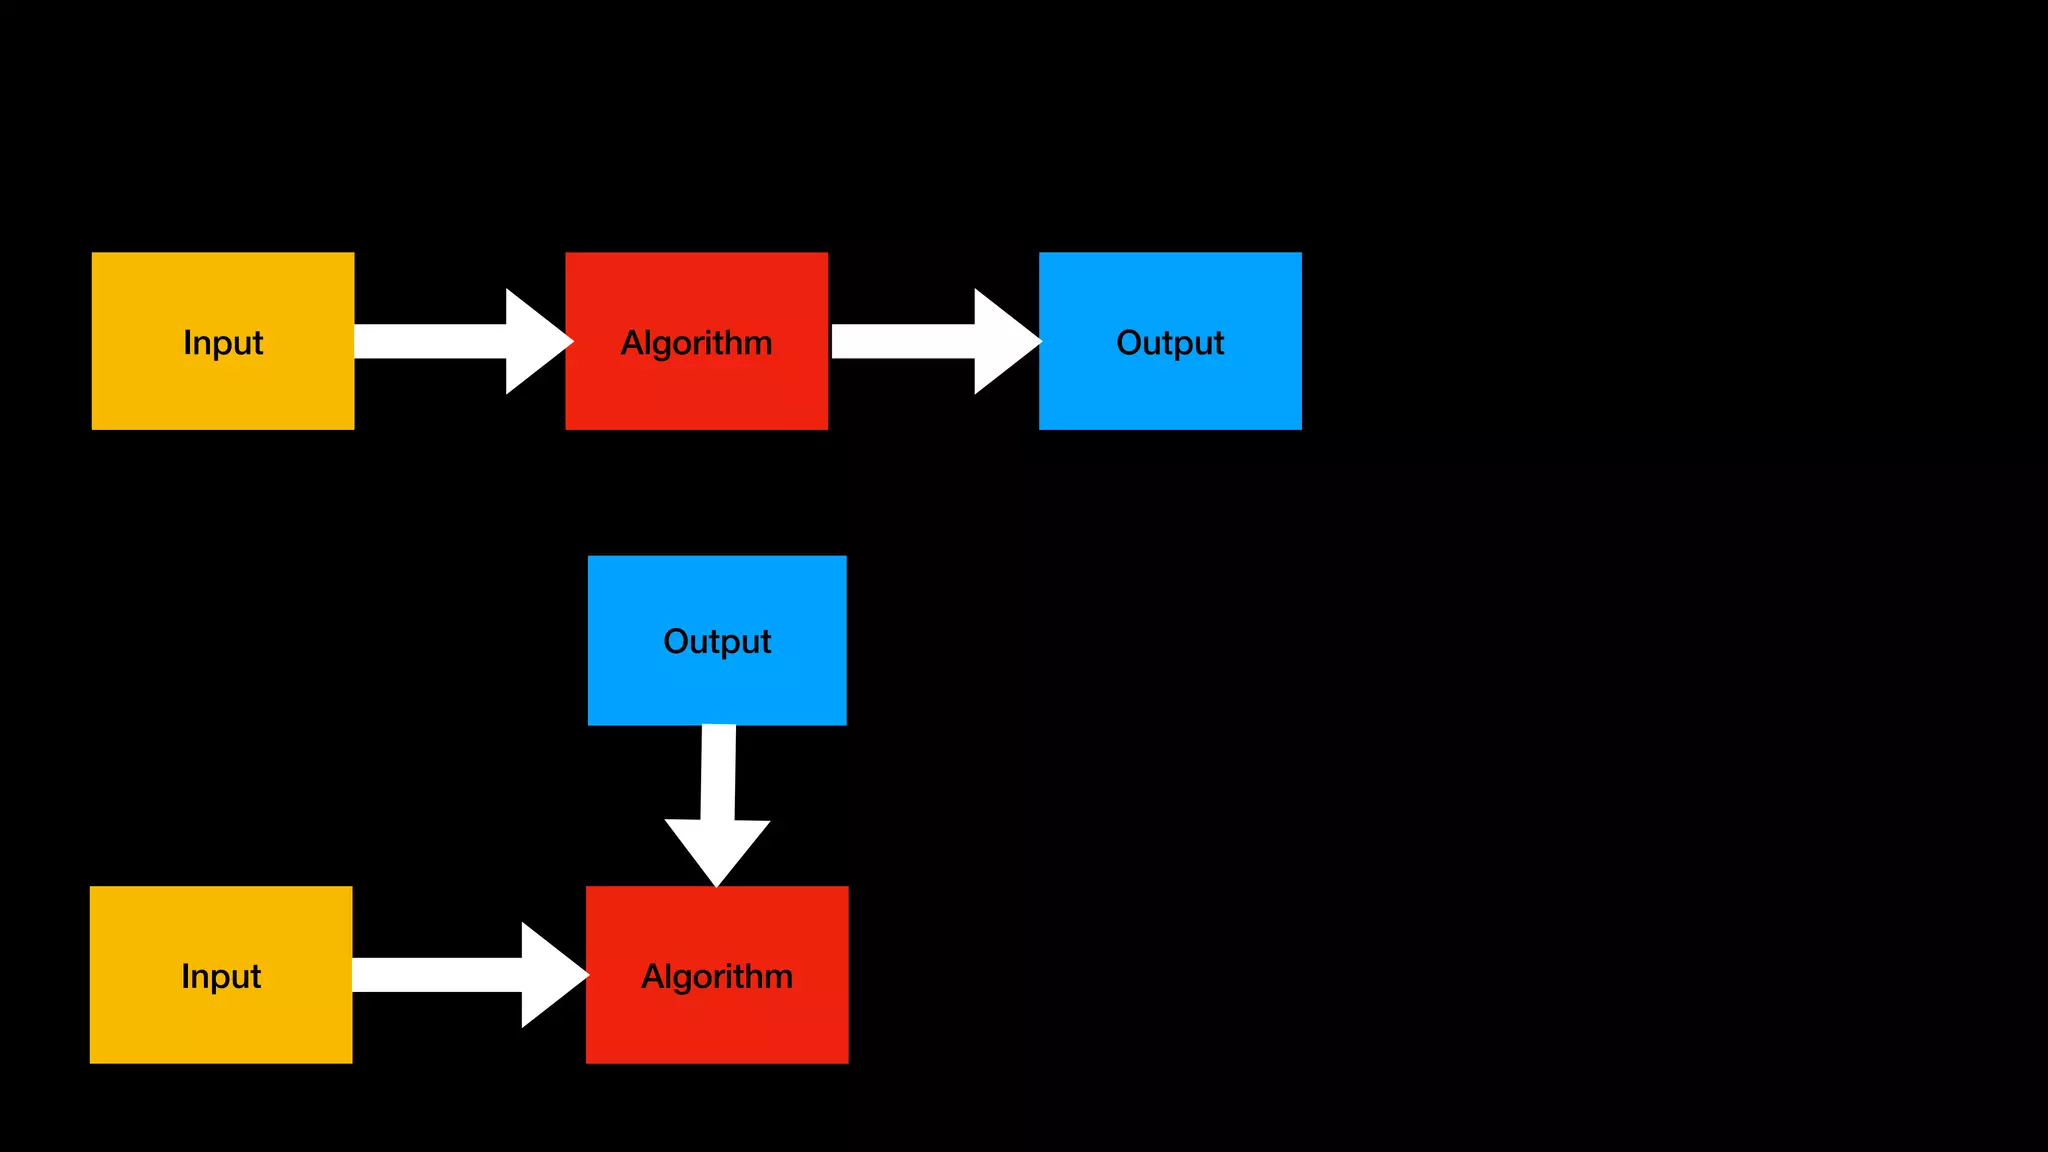

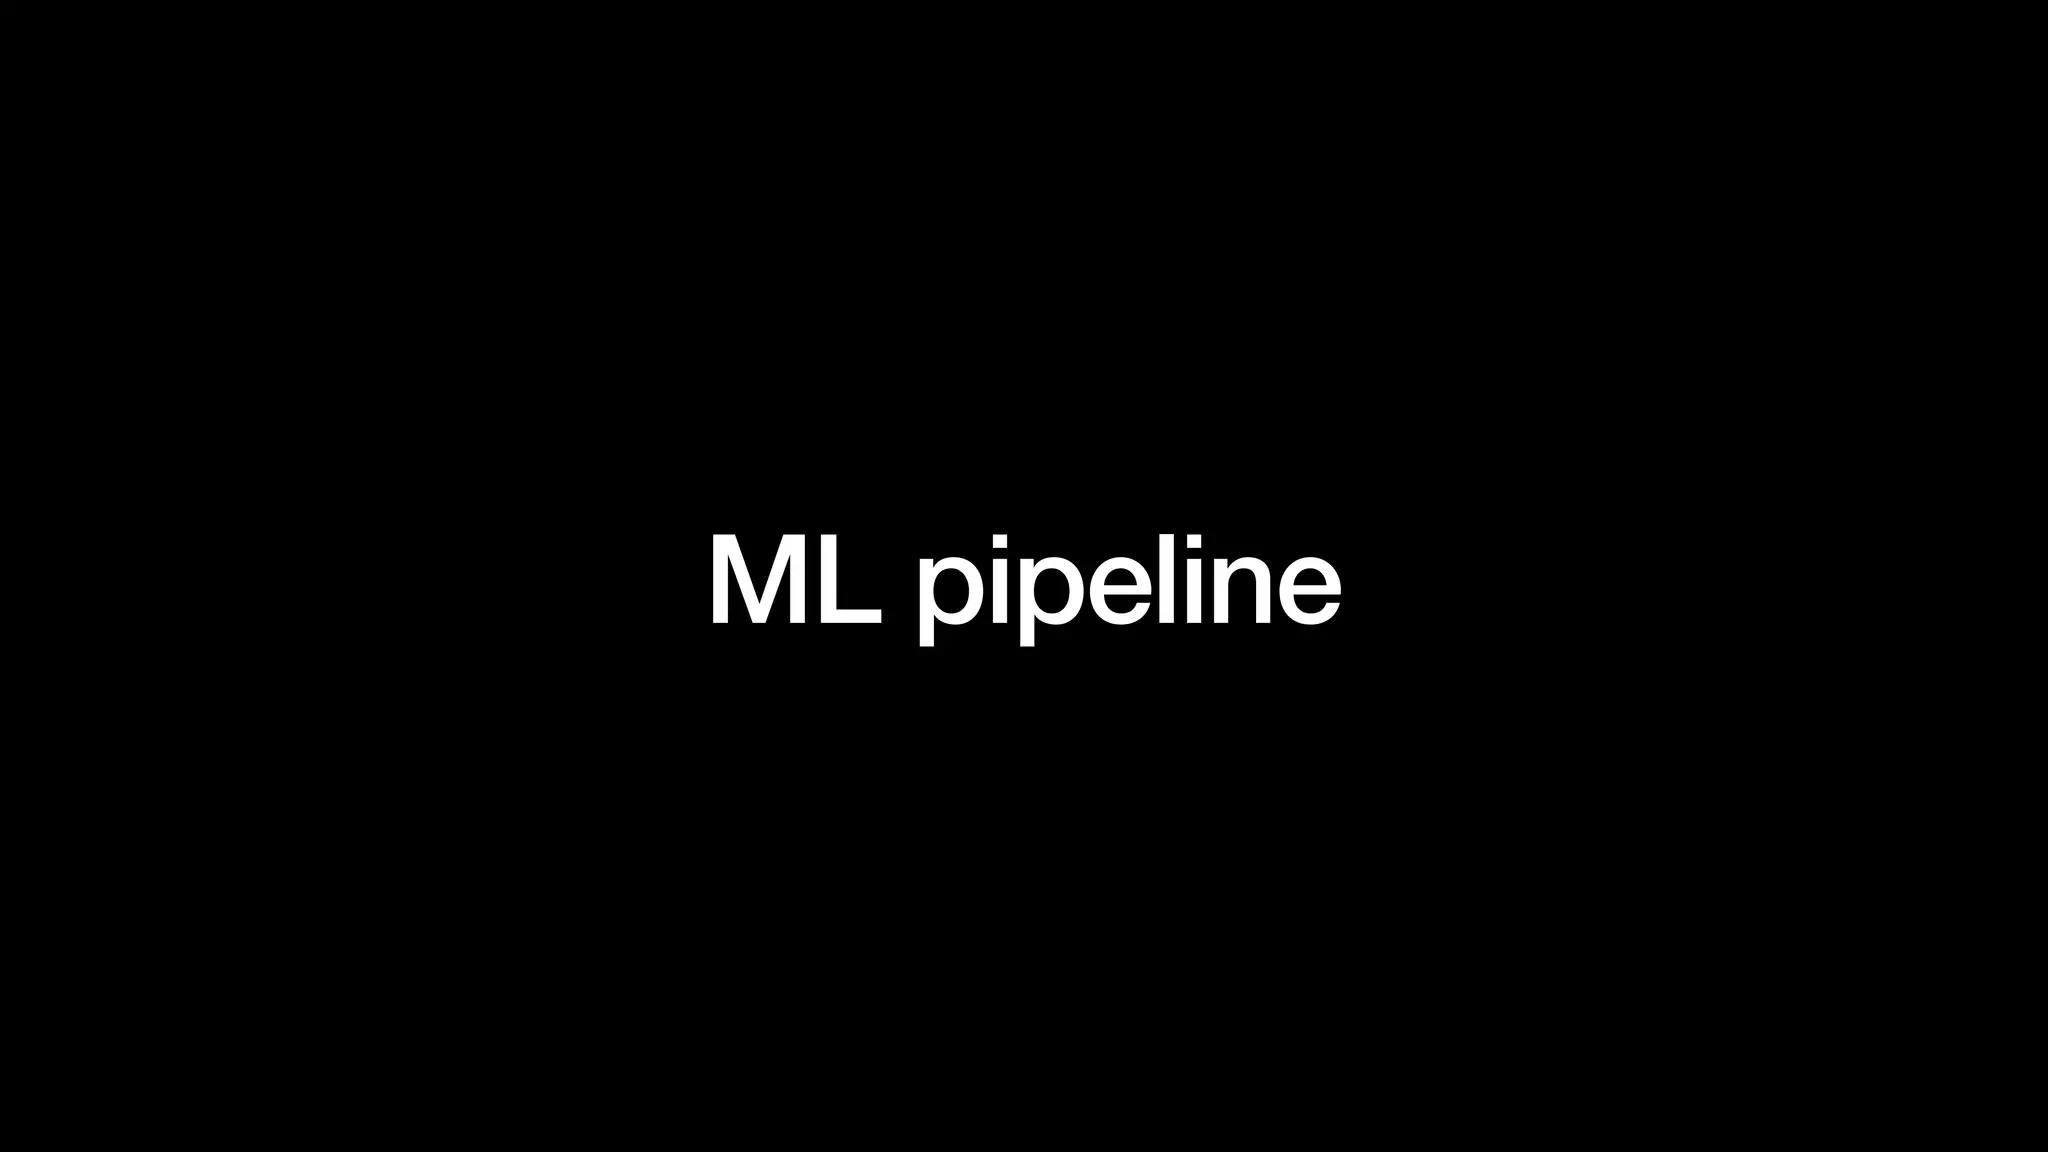

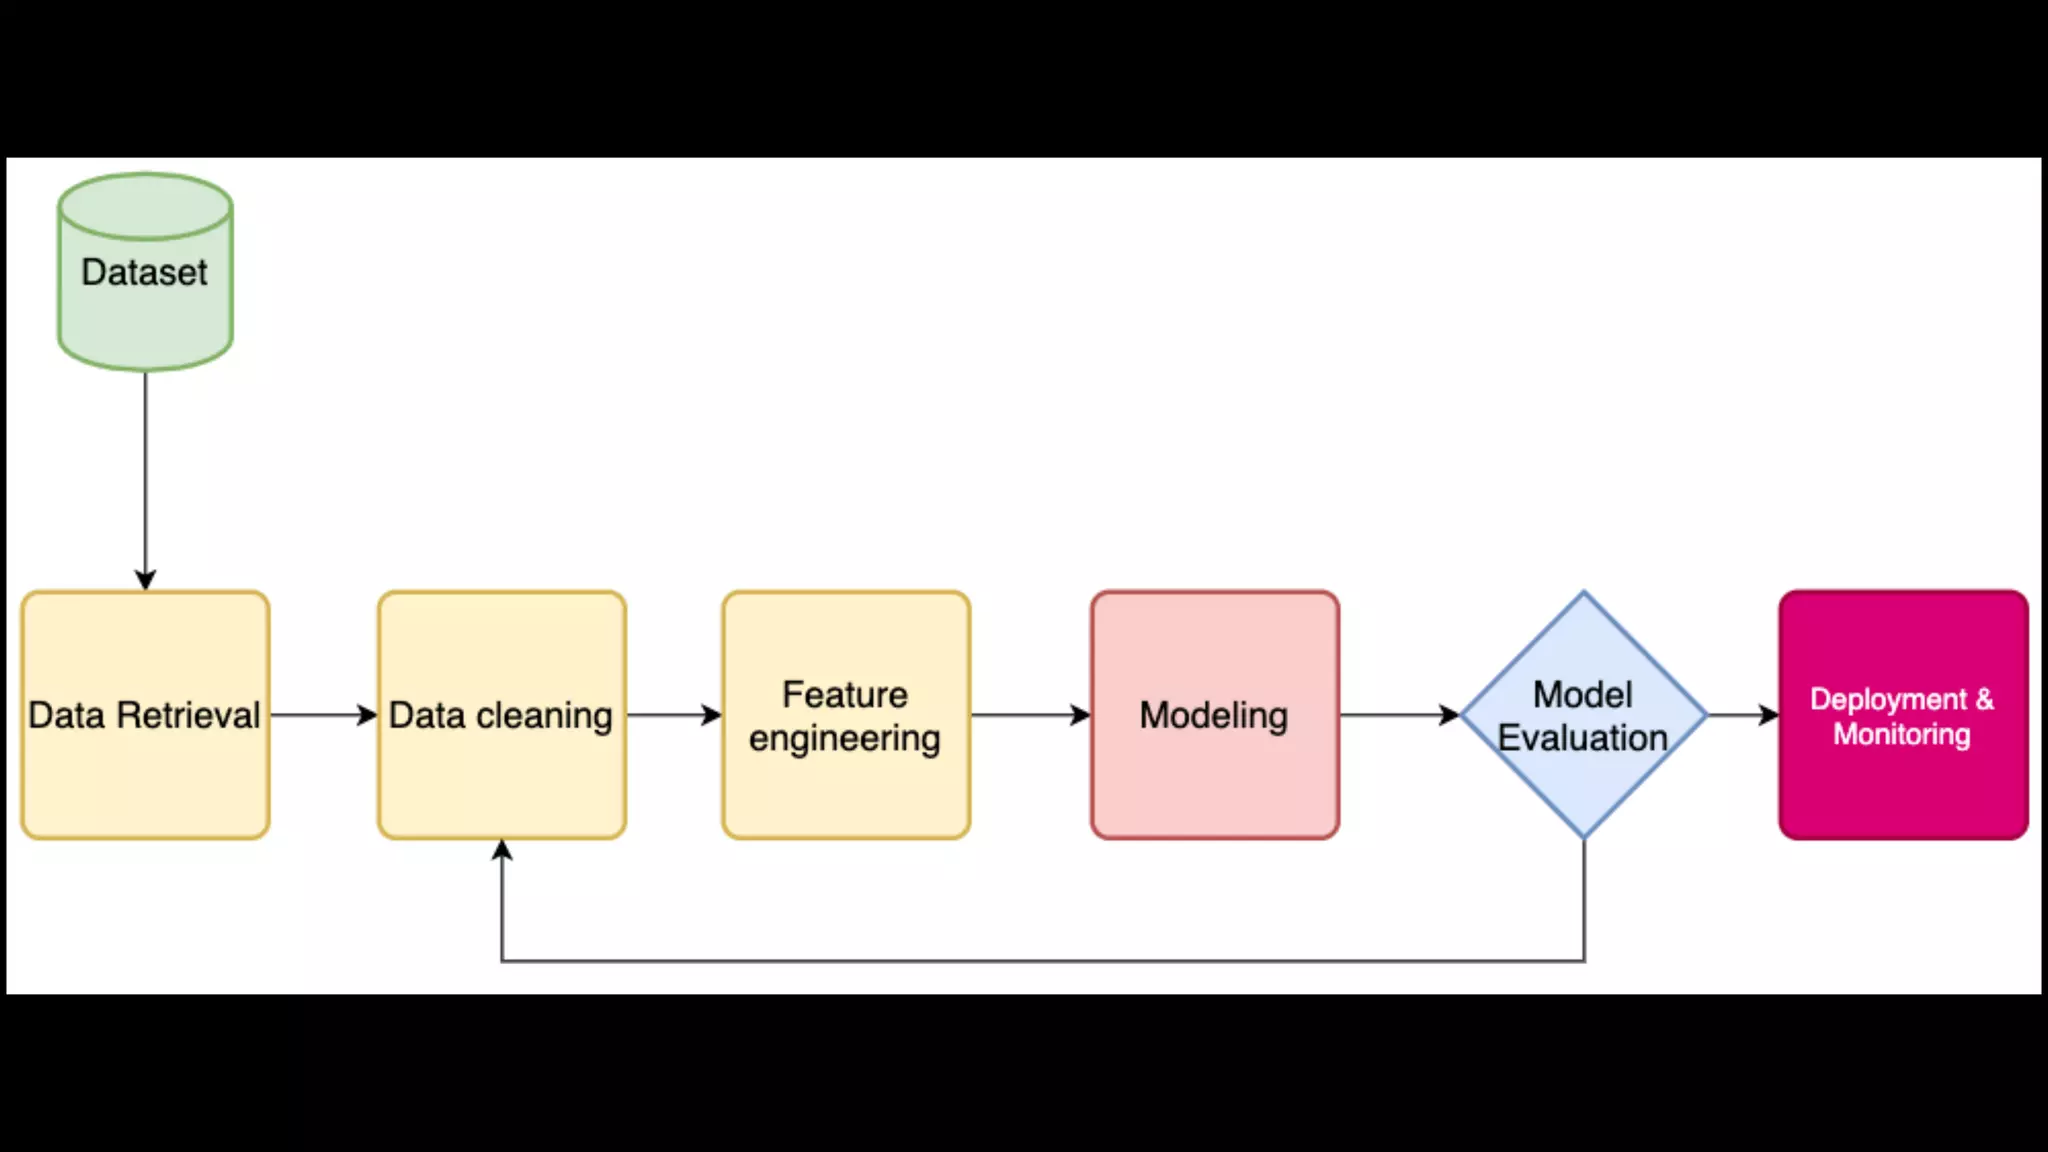

# Main Challenges of Machine Learning
In short, since your main task is to select a learning algorithm and train it on some data, the two things that can go wrong are `“bad algorithm”` and `“bad data.”` Let’s start with examples of bad data.
## Bad data
- Insufficient Quantity of Training Data
- Nonrepresentative Training Data
- Poor-Quality Data
- Irrelevant Features 
## Bad algorithms
- Overfitting the Training Data
- Underfitting the Training Data
## Solutions
- Stepping Back
- Testing and Validating
- Hyperparameter Tuning and Model Selection
- Data Mismatch

## End-to-End Machine Learning Project(Email Spam Detection )
A typical   **supervised learning** task is `classification`. The `spam filter is a good example`
of this: it is trained with many example emails along with their class (spam or ham),
and it must learn how to classify new emails.



## Create environment and install packages  
```console
uv init 
uv venv
uv add pandas scikit-learn numpy matplotlib ipykernel// or use the offline installation
```

In [ ]:
!uv init
!uv venv
!uv add pandas scikit-learn numpy matplotlib ipykernel

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


In [5]:
df =pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### filter out null values

In [6]:
data = df.where((pd.notnull(df)), '')
data.shape

(5572, 2)

###  Convertion of text data to numerical data

In [7]:
data.loc[data['Category'] == 'spam', 'Category'] = 1
data.loc[data['Category'] == 'ham', 'Category'] = 0
data.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [9]:
vectorizer = TfidfVectorizer(min_df=2,stop_words='english',lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
Y_train = y_train.astype('int')
Y_test = y_test.astype('int')



# Train

In [10]:
clf = LogisticRegression()
clf.fit(X_train_tfidf, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Accuracy For Train

In [11]:
predictions = clf.predict(X_train_tfidf)
accuracy = accuracy_score(Y_train, predictions)
print(accuracy)

0.973749158626879


#  Accuracy For Test

In [12]:
predictions_on_test = clf.predict(X_test_tfidf)
accuracy_on_test = accuracy_score(Y_test, predictions_on_test)
print(accuracy_on_test)

0.9704035874439462


# Test the Model

In [15]:
# input_your_mail = ["Free english in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_your_mail = ["Nah I don't think he goes to usf, he lives around here though"]

input_data = vectorizer.transform(input_your_mail)
predictions = clf.predict(input_data)
if predictions[0] == 1:
    print("spam")
else:
    print("ham")

ham
